## Preparation

Все нужные либы и проверка в какой директории работаем

Эту ячеку надо выполнять только в первый раз для установки всех либ. Лучше создать env

In [1]:
!pip3 install -r ../requirements.txt

from IPython.display import clear_output
clear_output() # если что-то не работает, уберите эту строчку и смотрите на ошибки

Импорт всех либ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import xlsxwriter
os.getcwd()

'/Users/kirilllalayants/Desktop/физика/PhysicsITMO_Electrostatics/lab3.07'

Создание эксель файла, в котором потом все сохраним


In [3]:
NAME_OF_EXCEL = 'data.xlsx'
# if not os.path.exists(NAME_OF_EXCEL):
#     xlsxwriter.Workbook(NAME_OF_EXCEL).close()
data_1 = pd.read_excel(NAME_OF_EXCEL, 'table_1')  
data_2 = pd.read_excel(NAME_OF_EXCEL, 'table_2')  
data_3 = pd.read_excel(NAME_OF_EXCEL, 'table_3')  
table_consts = pd.read_excel(NAME_OF_EXCEL, 'consts')  
print(table_consts.shape, data_1.shape, data_2.shape,data_3.shape ) 

(1, 18) (1, 8) (1, 10) (16, 9)


Предобработка 

In [3]:
# data_1["Kx, mV"] = data_1["Kx, mV"]/1000
# data_1["Ky, mV"] = data_1["Ky, mV"]/1000
# data_2["Kx, mV"] = data_2["Kx, mV"]/1000
# data_2["Ky, mV"] = data_2["Ky, mV"]/1000
# data_3["Kx, mV"] = data_3["Kx, mV"]/1000
# data_3["Ky, mV"] = data_3["Ky, mV"]/1000

# Обработка

### Таблица констант

In [4]:
table_consts

,N1,N2,"l, m","R1, Om","R2, Om","C1, F","S, sqm",dl,dR1,dR2,dC1,dS,alpha,beta,ksi,"f, Hz",dalpha,dbeta
0,1665,970,0.078,68,470000,4.700000e-07,0.000064,0.001,6.8,47000,4.700000e-08,0.000005,313.914027,3.558312,0.000836,30,31.648335,0.574902


In [5]:
alpha = table_consts['N1']/(table_consts['l, m'] * table_consts['R1, Om'])
dalpha = np.sqrt((table_consts['N1']/(table_consts['l, m'] **2 * table_consts['R1, Om'])*table_consts['dl '])**2 +(table_consts['N1']/(table_consts['l, m'] * table_consts['R1, Om']**2 )*table_consts['dR1'])**2)

beta = table_consts['R2, Om'] * table_consts['C1, F']/(table_consts['N2'] * table_consts['S, sqm'])
dbeta = np.sqrt((beta / table_consts['R2, Om'] * table_consts['dR2'])**2 + (beta / table_consts['C1, F'] * table_consts['dC1'])**2 + (beta / table_consts['S, sqm'] * table_consts['dS'])**2)

print(f"𝛼 = ({round(alpha.item())} +- {round(dalpha.item())}) 1/(m * Om),  eps_𝛼 = {round((dalpha/alpha).item(), 2)* 100}%")
print(f"β = ({round(beta.item(), 1)} +- {round(dbeta.item(), 1)}) Om * Ф/m^2,  eps_β = {round((dbeta/beta).item(), 3) * 100}%")

f = 30
ksi = data_1["Kx, mV"] * data_1["Ky, mV"] * table_consts['N1'] * table_consts['R2, Om'] * table_consts['C1, F'] * f / (table_consts['N2'] * table_consts['R1, Om'])

table_consts['alpha'] = alpha
table_consts['beta'] = beta
table_consts['ksi'] = ksi
table_consts['f, Hz'] = f
table_consts['dalpha'] = dalpha
table_consts['dbeta'] = dbeta


𝛼 = (314 +- 32) 1/(m * Om),  eps_𝛼 = 10.0%
β = (3.6 +- 0.6) Om * Ф/m^2,  eps_β = 16.2%


### 1. Значение коэрцитивной силы, остаточной индукции и магнитной проницаемости в состоянии насыщения.

In [6]:
# Коэрцитивная сила Hc
Hc = (alpha * data_1["Xc, ticks"] * data_1["Kx, mV"]).to_numpy()
dHc = np.sqrt((Hc/alpha * dalpha) ** 2)

# Рассчет остаточной индукции Br
Br = (beta * data_1["Yr, ticks"] * data_1["Ky, mV"]).to_numpy()
dBr = np.sqrt((Br/beta * dbeta) ** 2)

print(f"Br = ({round(Br.item(), 3)} +- {round(dBr.item(), 3)}) Тл,  eps_Br = {round((dBr/Br).item(), 2)* 100}%")
print(f"Hc = ({round(Hc.item(), 1)} +- {round(dHc.item(), 1)}) А/м,  eps_Hc = {round((dHc/Hc).item(), 2)* 100}%")

data_1['Hc, A/m'] = Hc 
data_1['Br, Tl'] = Br 
data_1['dHc'] = dHc 
data_1['dBr'] = dBr 

Br = (0.178 +- 0.029) Тл,  eps_Br = 16.0%
Hc = (25.1 +- 2.5) А/м,  eps_Hc = 10.0%


In [7]:
# Коэрцитивная сила Hm
Hm = (alpha * data_2["Xm, ticks"] * data_2["Kx, mV"]).to_numpy()
dHm = np.sqrt((Hm/alpha * dalpha) ** 2)

# Рассчет остаточной индукции Bm
Bm = (beta * data_2["Ym, ticks"] * data_2["Ky, mV"]).to_numpy()
dBm = np.sqrt((Bm/beta * dbeta) ** 2)

# Рассчет магнитной проницаемости mu
Mum = Bm / (Hm * 4 * np.pi * 10 ** -7 )
dMum = np.sqrt((Mum / Bm * dBm)**2 + (Mum / Hm * dHm)**2)

print(f"Bm = ({round(Bm.item(), 3)} +- {round(dBm.item(), 3)}) Тл,  eps_Br = {round((dBm/Bm).item(), 2)* 100}%")
print(f"Hm = ({round(Hm.item())} +- {round(dHm.item())}) А/м,  eps_Hc = {round((dHm/Hm).item(), 2)* 100}%")
print(f"𝜇 = ({round(Mum.item())} +- {round(dMum.item())}),  eps_𝜇 = {round((dMum/Mum).item(), 2)* 100}%")

data_2['Hm, A/m'] = Hm
data_2['Bm, Tl'] = Bm 
data_2['Mum'] = Mum
data_2['dHm'] = dHm
data_2['dBm'] = dBm 
data_2['dMum'] = dMum

Bm = (0.498 +- 0.08) Тл,  eps_Br = 16.0%
Hm = (132 +- 13) А/м,  eps_Hc = 10.0%
𝜇 = (3007 +- 573),  eps_𝜇 = 19.0%


### 2. Мощность потерь на перемагничивание ферромагнетика (с оценкой величины ее погрешности).

In [8]:
f = 30
ksi = data_1["Kx, mV"] * data_1["Ky, mV"] * table_consts['N1'] * table_consts['R2, Om'] * table_consts['C1, F'] * f / (table_consts['N2'] * table_consts['R1, Om'])
dksi = np.sqrt((ksi/table_consts['R2, Om'] * table_consts['dR2'])**2 + (ksi / table_consts['C1, F'] * table_consts['dC1'])**2 + (ksi / table_consts['R1, Om'] *  table_consts['dR1'])**2)

S = 7.16  # клеток
P = ksi * S
dP = np.sqrt((P/ksi * dksi)**2)

print(f"χ = ({round(ksi.item(), 5)} +- {round(dksi.item(), 5)}) Дж/с, eps_ksi = {round((dksi/ksi).item(), 2)* 100}%")
print(f"P = ({round(P.item(), 4)} +- {round(dP.item(), 4)}) Ватт, eps_P = {round((dP/P).item(), 2)* 100}%")
table_consts['ksi'] = ksi
table_consts['f, Hz'] = f

χ = (0.00084 +- 0.00014) Дж/с, eps_ksi = 17.0%
P = (0.006 +- 0.001) Ватт, eps_P = 17.0%


### 3. Графики зависимостей магнитной индукции и проницаемости от напряженности: 𝐵 = 𝐵(𝐻) и 𝜇 = 𝜇(𝐻)

In [9]:
data_3

,"U, V","S, small sq","X, ticks","Kx, mV","H, A/m","Y, ticks","Ky, mV",mu,"B, Tl"
0,5,3.370,1.6,0.05,25.113122,2.0,0.02,4510.175334,0.142332
1,6,5.070,1.6,0.05,25.113122,2.4,0.02,5412.210401,0.170799
2,7,4.970,1.8,0.05,28.252262,2.6,0.02,5211.758164,0.185032
3,8,7.265,2.2,0.05,34.530543,3.0,0.02,4920.191273,0.213499
4,9,8.405,2.4,0.05,37.669683,3.4,0.02,5111.532045,0.241965
5,10,10.010,2.8,0.05,43.947964,3.8,0.02,4896.761791,0.270432
6,11,5.110,3.2,0.05,50.226244,1.6,0.05,4510.175334,0.284665
7,12,5.570,3.6,0.05,56.504525,1.8,0.05,4510.175334,0.320248
8,13,4.060,2.0,0.10,62.782805,1.8,0.05,4059.157801,0.320248
9,14,4.840,2.4,0.10,75.339367,2.2,0.05,4134.327389,0.391414


In [10]:
data_3["H, A/m"] = alpha.to_numpy() * data_3["X, ticks"].to_numpy() * data_3["Kx, mV"].to_numpy()
data_3["B, Tl"] = beta.to_numpy() * data_3["Y, ticks"].to_numpy() * data_3["Ky, mV"].to_numpy() 
data_3['mu'] = data_3["B, Tl"].to_numpy() / (data_3["H, A/m"].to_numpy() * 4 * np.pi * 10 ** -7)

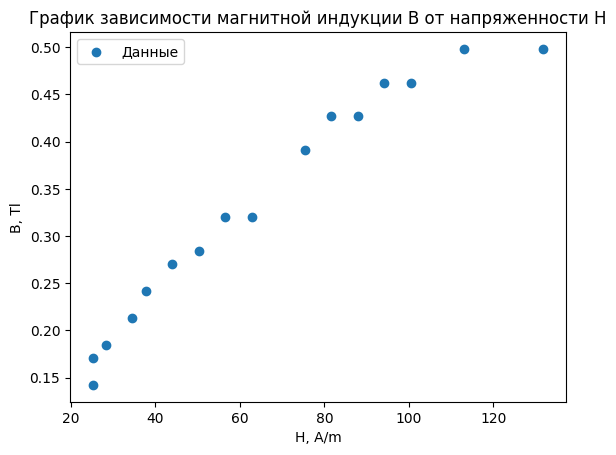

In [11]:
plt.scatter(data_3["H, A/m"], data_3["B, Tl"], label = "Данные")
plt.xlabel("H, A/m")
plt.ylabel("B, Tl")
plt.title("График зависимости магнитной индукции B от напряженности H")
plt.legend()

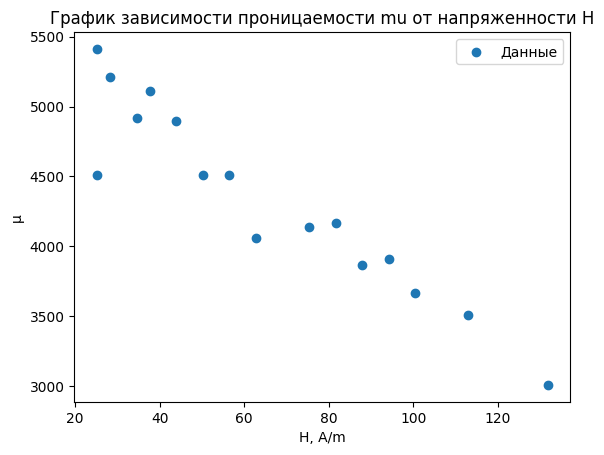

In [12]:
plt.scatter(data_3["H, A/m"], data_3["mu"], label = "Данные")
plt.xlabel("H, A/m")
plt.ylabel("μ")
plt.title("График зависимости проницаемости mu от напряженности H")
plt.legend()

In [4]:
data_3

,"U, V","S, small sq","X, ticks","Kx, mV","H, A/m","Y, ticks","Ky, mV",mu,"B, Tl"
0,5,3.370,1.6,0.05,25.113122,2.0,0.02,4510.175334,0.142332
1,6,5.070,1.6,0.05,25.113122,2.4,0.02,5412.210401,0.170799
2,7,4.970,1.8,0.05,28.252262,2.6,0.02,5211.758164,0.185032
3,8,7.265,2.2,0.05,34.530543,3.0,0.02,4920.191273,0.213499
4,9,8.405,2.4,0.05,37.669683,3.4,0.02,5111.532045,0.241965
5,10,10.010,2.8,0.05,43.947964,3.8,0.02,4896.761791,0.270432
6,11,5.110,3.2,0.05,50.226244,1.6,0.05,4510.175334,0.284665
7,12,5.570,3.6,0.05,56.504525,1.8,0.05,4510.175334,0.320248
8,13,4.060,2.0,0.10,62.782805,1.8,0.05,4059.157801,0.320248
9,14,4.840,2.4,0.10,75.339367,2.2,0.05,4134.327389,0.391414


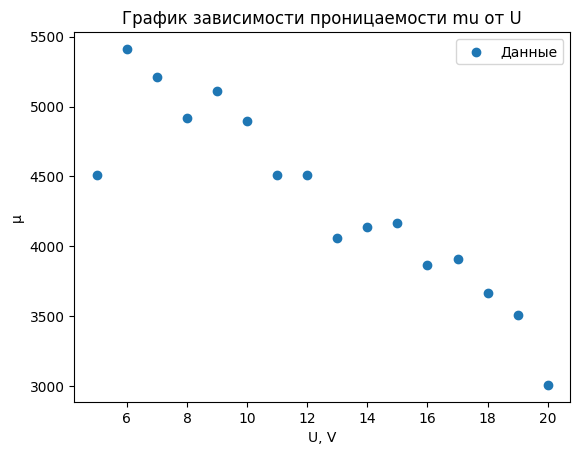

In [7]:
plt.scatter(data_3["U, V"], data_3["mu"], label = "Данные")
plt.xlabel("U, V")
plt.ylabel("μ")
plt.title("График зависимости проницаемости mu от U")
plt.legend()

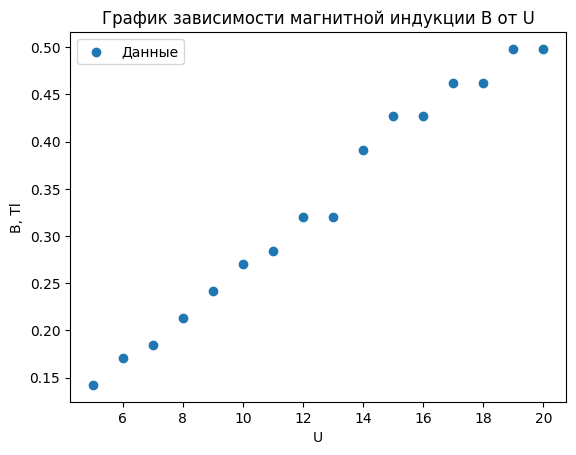

In [8]:
plt.scatter(data_3["U, V"], data_3["B, Tl"], label = "Данные")
plt.xlabel("U")
plt.ylabel("B, Tl")
plt.title("График зависимости магнитной индукции B от U")
plt.legend()

### 4. Максимальное значение проницаемости 𝜇𝑚𝑎𝑥 и напряженность поля, при которой она наблюдается.

In [13]:
index = data_3["mu"].to_numpy().argmax()
mu_max = data_3["mu"].iloc[index]
A_for_mu_max = data_3["H, A/m"].iloc[index]
print(f"μ_max = {mu_max.round(1)}, Tl \nпри H = {A_for_mu_max.round(1)}, A/m")

μ_max = 5412.2, Tl 
при H = 25.1, A/m


##  Сохранение в файл всех новых данных

In [36]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(NAME_OF_EXCEL)

data_1.to_excel(writer, index=False, sheet_name='table_1')
data_2.to_excel(writer, index=False, sheet_name='table_2')
data_3.to_excel(writer, index=False, sheet_name='table_3')
table_consts.to_excel(writer, index=False, sheet_name='consts')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

/var/folders/4m/cdm9j52s2fs9_8ccjqtb1sy00000gn/T/ipykernel_19108/1824329816.py:10: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
